In [1]:
pwd

'/Users/zofia/github/DFM/interactivePython'

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import sys
import os
sys.path.append('/Users/zofia/github/DFM/srcDiffmap')

import mdtraj as md

import integrator
import sampler #as sampler
import model #as model
import diffusionmap as dm
import numpy as np
from simtk import openmm, unit
from openmmtools.constants import kB

import model
mdl=model.Model()
print (mdl.x_unit)
print('System has %d particle(s)' % mdl.system.getNumParticles())
print (mdl.testsystem.positions)
X0=mdl.testsystem.positions.value_in_unit(mdl.x_unit)
print('Initial distance is %f' % np.linalg.norm(X0[0,:]-X0[ 1,:]))

algoVect=0

# parameters
T=400.0#400
temperature =  T * unit.kelvin#300 * unit.kelvin
kT = kB * temperature


gamma = 1.0 / unit.picosecond
dt = 2.0 * unit.femtosecond

TemperatureTAMDFactor=30.0
massScale=50.0

gammaScale=100.0
kappaScale=1000.0

print("TemperatureTAMDFactor = " + repr(TemperatureTAMDFactor))
temperatureAlpha= (T*TemperatureTAMDFactor)* unit.kelvin

print('Gamma is '+repr(gamma))
print('Temperature is '+repr(temperature))
print('Temperature TAMD '+repr(TemperatureTAMDFactor)+'xTemperature')
print('Mass alpha is '+repr(massScale)+'x Mass')



# simulation class sampler takes integrator class with chosen parameters as input
integrator=integrator.Integrator( model=mdl, gamma=gamma, temperature=temperature, temperatureAlpha=temperatureAlpha, dt=dt, massScale=massScale, gammaScale=gammaScale, kappaScale=kappaScale)
samplerAlgo=sampler.Sampler(model=mdl, integrator=integrator, algorithm=0, dataFileName='Data')

# nrSteps is number of steps for each nrRep , and iterate the algo nrIterations times - total simulation time is nrSteps x nrIterations
# nrSteps=args.nrSteps
# nrEquilSteps = 10 #10000
# nrIterations=args.niterations
# nrRep=args.nreplicas

algoNames=samplerAlgo.algorithmName



Dimer model: double-well with 2 states
State1: r=Quantity(value=1.55, unit=angstrom)
State2: r=Quantity(value=2.55, unit=angstrom)
angstrom
System has 2 particle(s)
[[ 0.          0.          0.        ]
 [ 1.54999995  0.          0.        ]] A
Initial distance is 1.550000
TemperatureTAMDFactor = 30.0
Gamma is Quantity(value=1.0, unit=/picosecond)
Temperature is Quantity(value=400.0, unit=kelvin)
Temperature TAMD 30.0xTemperature
Mass alpha is 50.0x Mass
921.525581421 K


In [3]:
colorList=['red', 'blue', 'black', 'green']
    
min1=1.55*model.unit.angstroms
min2=2.55*model.unit.angstroms

print(min1)

1.55 A


In [4]:
import glob
numpy_vars = []
for np_name in glob.glob('/Users/zofia/github/DFM/Data/Std/Traj/*.h5'):
    numpy_vars.append(md.load(np_name))

traj = numpy_vars

# traj=(traj.reshape(traj.shape[0]*traj.shape[1],traj.shape[2]))

print(len(traj))
#print(Xmdtraj[0].xyz.shape)

10


3
(10000, 2, 3)
(10000,)


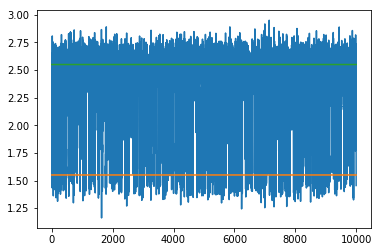

1.67299836948
2.23272148042


In [5]:
import mdtraj as md
Xmdtraj=list()
for i in range(len(traj)):
    Xmdtraj.append(md.Trajectory(traj[i].xyz, mdl.testsystem.topology) )
#md.load('/Users/zofia/github/DFM/Data/Std/Traj/std_traj_0.h5')
#Xmdtraj=md.load('/Users/zofia/github/DFM/Data/Tsc30MS50/Traj/eftad_diffmap_local_traj_0.h5')
#Xmdtraj=md.load('/Users/zofia/github/DFM/Data/Tsc30MS50/Traj/eftad_diffmap_local_trajTAMD_0.h5')

print(Xmdtraj[0].xyz.shape[2])
L=int(Xmdtraj[0].xyz.shape[0]*len(traj))
nrP=int(Xmdtraj[0].xyz.shape[1])
D=int(Xmdtraj[0].xyz.shape[2])
X=np.zeros((L, nrP, D))
for i in range(0,len(Xmdtraj)):
        X[i*len(Xmdtraj[i].xyz):(i+1)*len(Xmdtraj[i].xyz),:,:]=Xmdtraj[i].xyz


#Xmdtraj.topology=mdl.testsystem.topology
#Xmdtraj=Xmdtraj.superpose(Xmdtraj[0])


print(X.shape)
#r=(np.sqrt(np.sum((X[:, 0, :] - X[:, 1, :])**2, axis=1)))

r=np.linalg.norm(X[:,0,:]-X[:,1,:], 2, axis=1)
#rmsd=md.rmsd(Xmdtraj[0],Xmdtraj)
print(r.shape)


plt.plot(range(len(r)), r)
plt.plot(range(len(r)), np.ones(len(r))*min1)
plt.plot(range(len(r)), np.ones(len(r))*min2)
plt.show()

print(np.linalg.norm(X[0, 0,:]-X[0, 1,:]))
print(np.mean(r))

# plt.plot(range(len(r)),X[:,1,0])
# plt.show()

#print(X[:,0,1])

#print(Xmdtraj[0].xyz)
#XT=md.Trajectory(traj[0].xyz, mdl.testsystem.topology)
#print(traj[0])


In [6]:
#Xshow=md.Trajectory(X, mdl.testsystem.topology)
#print(X[0])
#print(Xshow.xyz)
#Xshow.save_pdb('dimer.pdb')
#Xshow.topology.save_xtc('dimer_tp.XTC')
#XT=traj[0]
#print(traj[0])
#traj[0].topology=mdl.testsystem.topology

traj[0]=traj[0].superpose(traj[0][0])
tpl=traj[0].topology
print(tpl)
import nglview as nv
#import pytraj as pt
#view = nglview.show_structure_file('dimer.pdb')  # load "3pqr" from RCSB PDB and display viewer widget
#t = md.load_xtc('dimer.XTC',mdl.testsystem.topology)
view = nv.show_mdtraj(traj[0])

view.add_representation('spacefill', selection='all' )
view.frame = 10
view

#view = nglview.show_mdtraj(Xshow)
#view


<mdtraj.Topology with 1 chains, 1 residues, 2 atoms, 0 bonds>


A Jupyter Widget

In [107]:
import imp
imp.reload(sampler)
imp.reload(dm)


def FE(tr, eps, numberOfLandmarks, smpl, model, T, method): 
        
        tr_orig=tr
        
        tmp=md.Trajectory(tr, model.testsystem.topology)
        tmp.superpose(tmp[0])
        #------ reshape data ------------------------------

        tmp =  tmp.xyz.reshape((tmp.xyz.shape[0], tmp.xyz.shape[1]*tmp.xyz.shape[2]))
                
        tr=tmp
        v1, qTarget, qEmp, Epot=sampler.dominantEigenvectorDiffusionMap(tr, eps, smpl, T, method)
        
        qTargetNormalized = qTarget/np.sum(qTarget)
        
        #get landmarks
        lm, levelsets, linspV = dm.get_landmarks(tr, numberOfLandmarks, qTargetNormalized, v1, Epot, getLevelSets=True)
        #(tr, numberOfLandmarks, q , v1)
        levelsets, levels = dm.get_levelsets(tr, numberOfLandmarks, qTargetNormalized, v1);
        
        #xIS, Ntilde, weight = stat.unbias(tr, eps, samplerTAMD)
        
        K=len(levelsets)
        print (K)
        freeEnergy=np.zeros(K)
        h=np.zeros(K)

        for k in range(0,K):
            # simple histogram
            h[k] = np.sum(len(levelsets[k]))
#              # unbiased histogram
#               h[k] = np.sum(weight[levelsets[k]])
            
        for k in range(0,K):
            if(h[k] == 0):
                freeEnergy[k] = 1 # this happens if the bin is empty
            else:
                freeEnergy[k] = -np.log(h[k]/sum(h))

        
        tr =  tr.reshape((tr_orig.shape[0], tr_orig.shape[1],tr_orig.shape[2]))
        
        return tr, levelsets, v1, freeEnergy, linspV, lm, qEmp, Epot




Dimer model: double-well with 2 states
State1: r=Quantity(value=1.55, unit=angstrom)
State2: r=Quantity(value=2.55, unit=angstrom)


In [110]:
print(len(X[::10]))

1000


In [111]:
numberOfLandmarks=10
epsilon=1

Xshort=X[::10]


#levelsets, v1PCA, freeEnergyPCA, linspV, lmPCA, qEmpPCA =FE(X, epsilon, numberOfLandmarks, samplerTAMD, samplerTAMD.model, samplerTAMD.T, 'PCA')#'TMDiffmap')#'Diffmap')

#
Xsp,levelsets, v1TMDiffmap, freeEnergyTMDiffmap, linspV, lmTMDiffmap, qEmpTDM, Epot =FE(Xshort, epsilon, numberOfLandmarks, samplerAlgo, samplerAlgo.model, samplerAlgo.T, 'Diffmap')#'TMDiffmap')#'Diffmap')

#levelsets, v1TMDiffmap, freeEnergyTMDiffmap, linspV, lmTMDiffmap, qEmpTDM, Epot =FE(X, epsilon, numberOfLandmarks, samplerAlgo, samplerAlgo.model, samplerAlgo.T, 'TMDiffmap')#'TMDiffmap')#'Diffmap')

r=np.linalg.norm(Xsp[:,0,:]-Xsp[:,1,:], 2, axis=1)

Adaptive epsilon in compute_kernel is 0.11708899602176029
10


[ 1.89008422  1.17503836  1.89749166  2.82876395  3.21553692  3.22952317
  3.02629492  2.53637599  2.41702923  3.36506866]


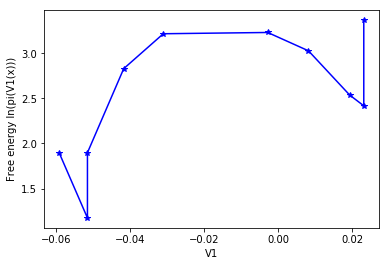

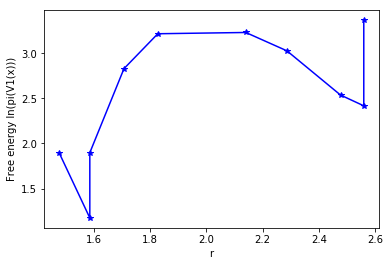

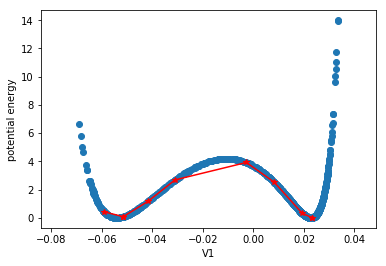

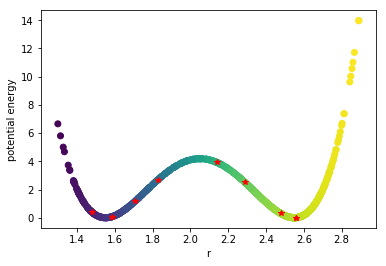

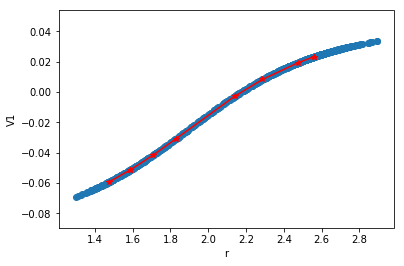

In [114]:
print(freeEnergyTMDiffmap)
#plt.scatter(v1TMDiffmap, Epot)
plt.plot(v1TMDiffmap[lmTMDiffmap], freeEnergyTMDiffmap, '*-b')
plt.xlabel('V1')
plt.ylabel('Free energy ln(pi(V1(x)))')
plt.show()

plt.plot(r[lmTMDiffmap], freeEnergyTMDiffmap, '*-b')
plt.xlabel('r')
plt.ylabel('Free energy ln(pi(V1(x)))')
plt.show()


plt.scatter(  v1TMDiffmap, Epot)
plt.plot( v1TMDiffmap[lmTMDiffmap],Epot[lmTMDiffmap], '*-r')
plt.xlabel('V1')
plt.ylabel('potential energy')
plt.show()

plt.scatter(  r, Epot, c=v1TMDiffmap)
plt.plot(  r[lmTMDiffmap], Epot[lmTMDiffmap], '*r')
plt.xlabel('r')
plt.ylabel('potential energy')
plt.show()

plt.scatter(  r, v1TMDiffmap)
plt.plot(  r[lmTMDiffmap], v1TMDiffmap[lmTMDiffmap], '*-r')
plt.xlabel('r')
plt.ylabel('V1')
plt.show()

(10,)


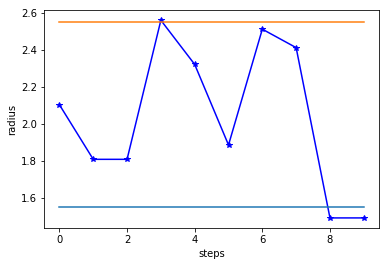

In [115]:

rLM=np.linalg.norm(X[lmTMDiffmap,0,:]-X[lmTMDiffmap,1,:], 2, axis=1)
#rmsd=md.rmsd(Xmdtraj[0],Xmdtraj)
print(rLM.shape)

plt.plot(range(len(rLM)), rLM, '*-b')
plt.plot(range(len(rLM)), np.ones(len(rLM))*min1)
plt.plot(range(len(rLM)), np.ones(len(rLM))*min2)
plt.xlabel('steps')
plt.ylabel('radius')
plt.show()



In [ ]:
# imp.reload(dm)

# Xmd=traj[0]
# tmp=md.Trajectory(Xmd[0].xyz, mdl.testsystem.topology)
# #print(Xmd[0].xyz)


# p1=Xmd[0].xyz
# p2=Xmd[1].xyz

# print (p1[0].shape)

# #print(p1[0])#(p1.shape[0],p1.shape[1])
# p1res=p1.reshape(p1[0].shape[0]*p1[0].shape[1])
# print(p1res)
# p2res=p2.reshape(p1[0].shape[0]*p1[0].shape[1])
# print(p2res)

# print(md.rmsd(Xmd[0], Xmd[1]))
# print(np.linalg.norm(p1res-p2res,2))

# print(len(p1res)/3)
# p1md=p1res.reshape(int(len(p1res)/3), 3)
# p2md=p2res.reshape(int(len(p2res)/3), 3)
# print(p1md)

# p1MD=md.Trajectory(p1md, mdl.testsystem.topology)
# p2MD=md.Trajectory(p2md, mdl.testsystem.topology)

# print(md.rmsd(p1MD, p2MD))
# kernel = dm.compute_kernel_mdtraj(Xmd, 0.1)